In [60]:
# بارگذاری دیتاست

from sklearn.datasets import fetch_openml
import pandas as pd
dataset = fetch_openml(data_id = 560 , as_frame =True)
df = dataset.frame
df.head(5)

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,class
0,1.0708,23,154.2500,67.7500,36.2000,93.1000,85.2000,94.5000,59.0000,37.3000,21.9000,32.0000,27.4000,17.1000,12.3000
1,1.0853,22,173.2500,72.2500,38.5000,93.6000,83.0000,98.7000,58.7000,37.3000,23.4000,30.5000,28.9000,18.2000,6.1000
2,1.0414,22,154.0000,66.2500,34.0000,95.8000,87.9000,99.2000,59.6000,38.9000,24.0000,28.8000,25.2000,16.6000,25.3000
3,1.0751,26,184.7500,72.2500,37.4000,101.8000,86.4000,101.2000,60.1000,37.3000,22.8000,32.4000,29.4000,18.2000,10.4000
4,1.0340,24,184.2500,71.2500,34.4000,97.3000,100.0000,101.9000,63.2000,42.2000,24.0000,32.2000,27.7000,17.7000,28.7000


In [61]:
# تغییر نام ستون اخر

df = df.rename(columns={'class':'target'})
df.columns

Index(['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip',
       'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'target'],
      dtype='object')

In [62]:
# کاوش داده ها

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   Age      252 non-null    int64  
 2   Weight   252 non-null    float64
 3   Height   252 non-null    float64
 4   Neck     252 non-null    float64
 5   Chest    252 non-null    float64
 6   Abdomen  252 non-null    float64
 7   Hip      252 non-null    float64
 8   Thigh    252 non-null    float64
 9   Knee     252 non-null    float64
 10  Ankle    252 non-null    float64
 11  Biceps   252 non-null    float64
 12  Forearm  252 non-null    float64
 13  Wrist    252 non-null    float64
 14  target   252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


array([[<Axes: title={'center': 'Density'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Neck'}>,
        <Axes: title={'center': 'Chest'}>,
        <Axes: title={'center': 'Abdomen'}>,
        <Axes: title={'center': 'Hip'}>],
       [<Axes: title={'center': 'Thigh'}>,
        <Axes: title={'center': 'Knee'}>,
        <Axes: title={'center': 'Ankle'}>,
        <Axes: title={'center': 'Biceps'}>],
       [<Axes: title={'center': 'Forearm'}>,
        <Axes: title={'center': 'Wrist'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

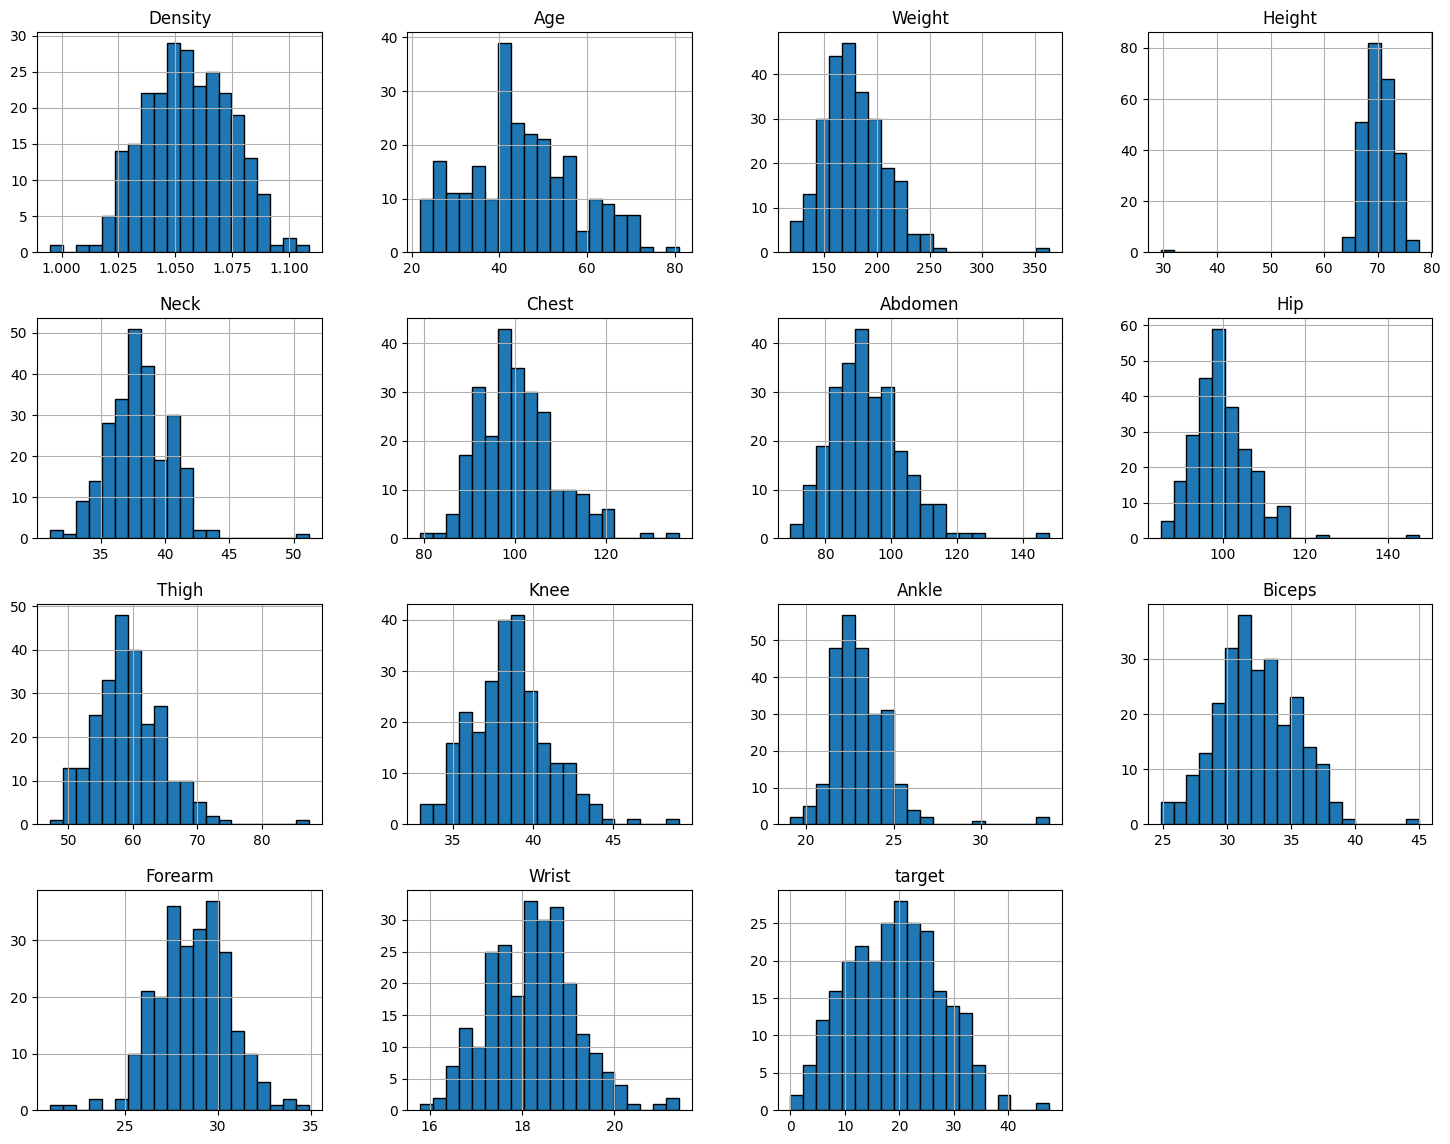

In [63]:
# بررسی و کاوش داده ها و تشخیص وضعیت چولگی

import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(18, 14), edgecolor='black')

array([[<Axes: title={'center': 'Density'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Neck'}>,
        <Axes: title={'center': 'Chest'}>,
        <Axes: title={'center': 'Abdomen'}>,
        <Axes: title={'center': 'Hip'}>],
       [<Axes: title={'center': 'Thigh'}>,
        <Axes: title={'center': 'Knee'}>,
        <Axes: title={'center': 'Ankle'}>,
        <Axes: title={'center': 'Biceps'}>],
       [<Axes: title={'center': 'Forearm'}>,
        <Axes: title={'center': 'Wrist'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

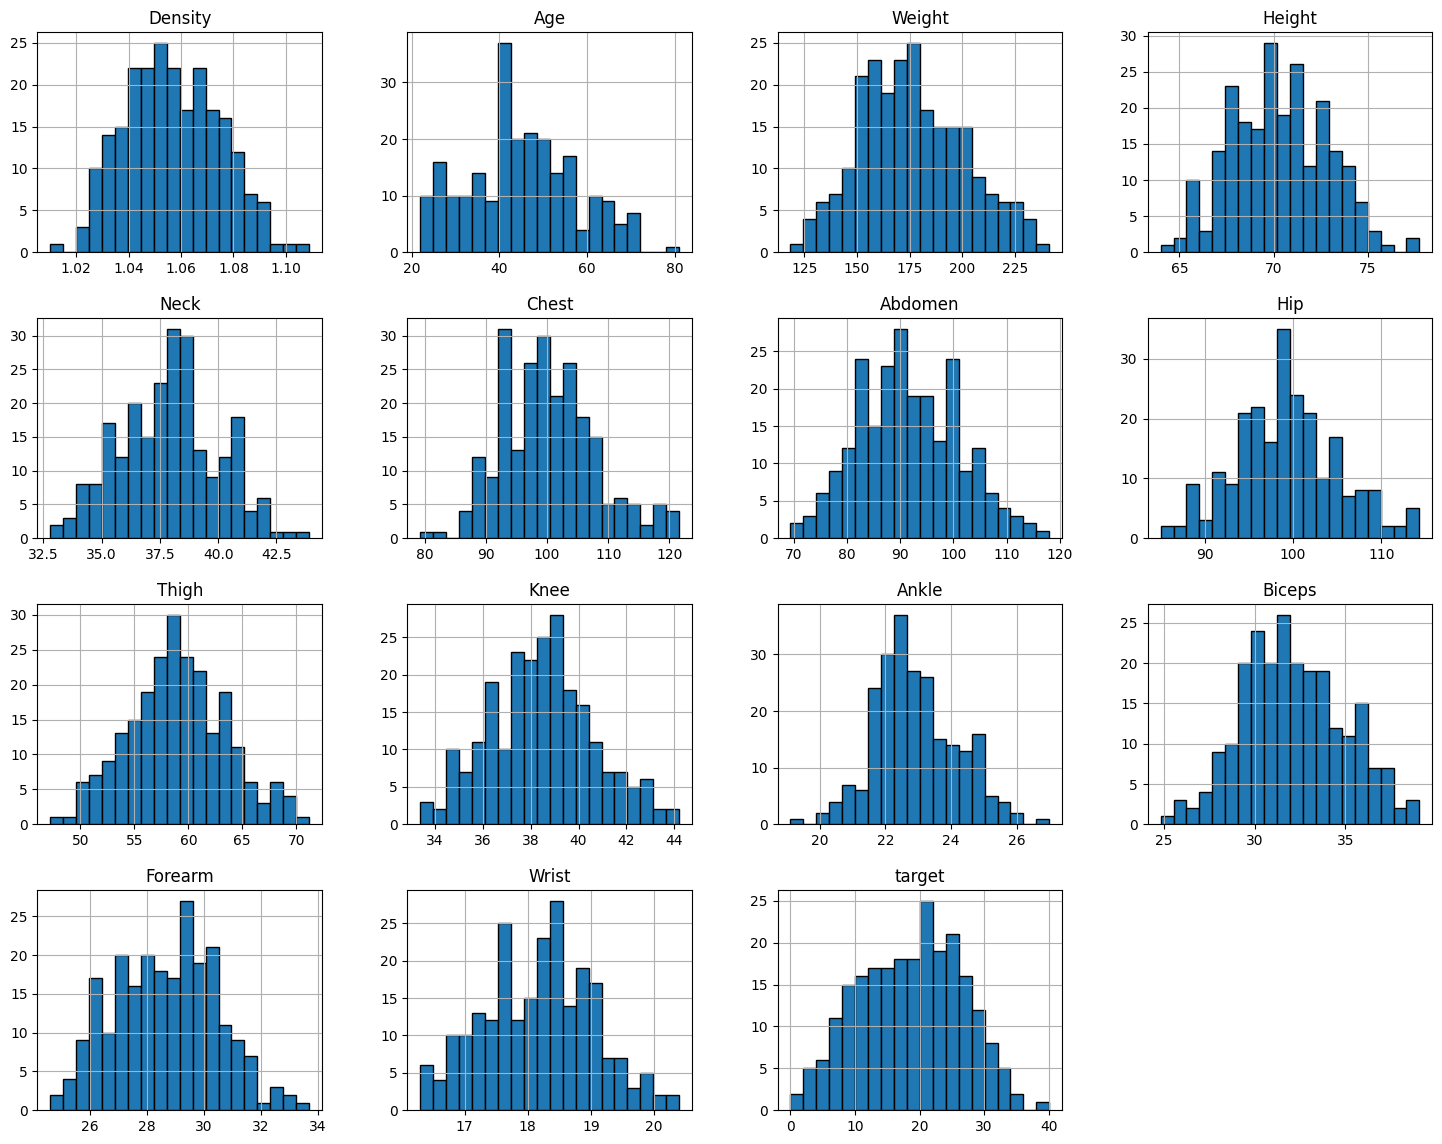

In [64]:
# حذف داده های پرت

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
df_clean = df[~outliers.any(axis=1)]
df_clean.hist(bins=20, figsize=(18, 14), edgecolor='black')

In [65]:
# ساخت ویژگی های جدید و کاهش ابعداد
# چون وزن بر حسب پوند هست و قد بر حسب اینج فرمول اینجوری میشه

df_clean['BMI'] = (df_clean['Weight'] * 703) / (df_clean['Height'] ** 2)

# حذف ستون قد و وزن

df_clean.drop(['Weight', 'Height'], axis=1, inplace=True)
df_clean.head(5)

<ipython-input-65-0f3125632059>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['BMI'] = (df_clean['Weight'] * 703) / (df_clean['Height'] ** 2)
<ipython-input-65-0f3125632059>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(['Weight', 'Height'], axis=1, inplace=True)


,Density,Age,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,target,BMI
0,1.0708,23,36.2000,93.1000,85.2000,94.5000,59.0000,37.3000,21.9000,32.0000,27.4000,17.1000,12.3000,23.6245
1,1.0853,22,38.5000,93.6000,83.0000,98.7000,58.7000,37.3000,23.4000,30.5000,28.9000,18.2000,6.1000,23.3320
2,1.0414,22,34.0000,95.8000,87.9000,99.2000,59.6000,38.9000,24.0000,28.8000,25.2000,16.6000,25.3000,24.6663
3,1.0751,26,37.4000,101.8000,86.4000,101.2000,60.1000,37.3000,22.8000,32.4000,29.4000,18.2000,10.4000,24.8808
4,1.0340,24,34.4000,97.3000,100.0000,101.9000,63.2000,42.2000,24.0000,32.2000,27.7000,17.7000,28.7000,25.5149


In [66]:
# تقسیم داده ها به تست و ترین

from sklearn.model_selection import train_test_split

x = df_clean.drop(columns='target')
y = df_clean['target']

x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

**linearRegression**

In [67]:
# ساخت پایپ لاین و انتخاب مدل
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

pipe = Pipeline([
    ('scaler' , StandardScaler()),
    ('model',LinearRegression())
])

In [68]:
# فیت کردن مدل
pipe.fit(x_train ,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [69]:
# پیش بینی رویه داده های تست
y_pred = pipe.predict(x_test)

In [70]:
# ارزیابی مدل
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae , mse, rmse , r2 ,

(0.4697224394185874,
 0.6131097990056773,
 np.float64(0.7830132815001782),
 0.9898756353445105)

In [71]:
# کراس ولیدیشن
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipe , x , y , cv = 5 , scoring='r2' )
scores

array([0.97443747, 0.88671602, 0.98942562, 0.98661566, 0.99078136])

In [72]:
# تحلیل اهمیت فیچر ها
feature_names = x_train.columns
coefs = pipe.named_steps['model'].coef_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs
}).sort_values(by='Coefficient', key=abs, ascending=False)
importance_df

,Feature,Coefficient
0,Density,-7.2395
4,Abdomen,0.3696
3,Chest,0.3618
8,Ankle,-0.2603
5,Hip,0.2131
12,BMI,-0.1780
9,Biceps,-0.1055
1,Age,0.1026
7,Knee,0.0982
2,Neck,0.0701


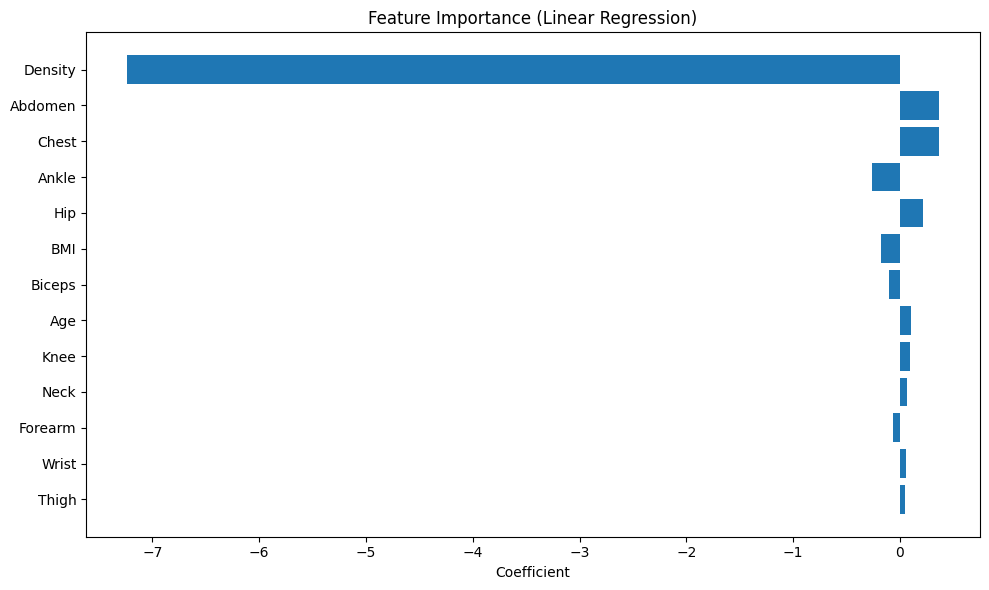

In [73]:
# رسم نمودار
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'])
plt.xlabel('Coefficient')
plt.title('Feature Importance (Linear Regression)')
plt.gca().invert_yaxis()
plt.tight_layout()

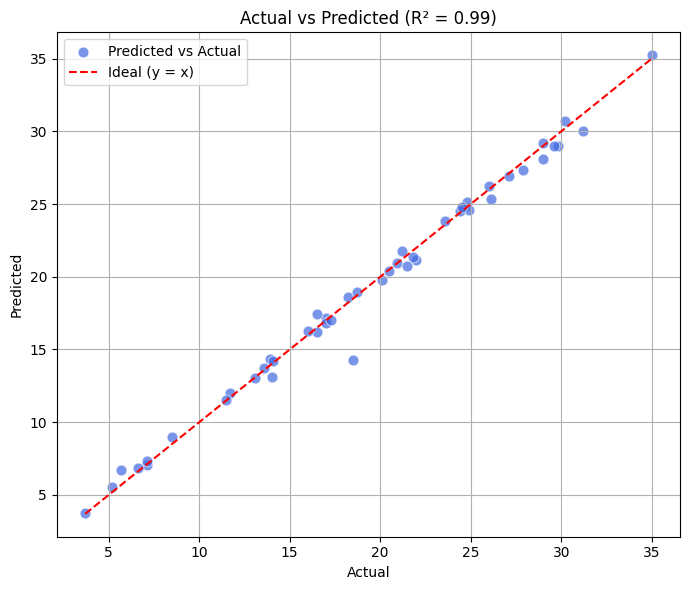

In [74]:
# رسم نمودار
import seaborn as sns

plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue', alpha=0.7, s=60, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal (y = x)')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Actual vs Predicted (R² = {r2:.2f})")
plt.legend(loc='upper left')  # یا loc='best'
plt.grid(True)
plt.tight_layout()

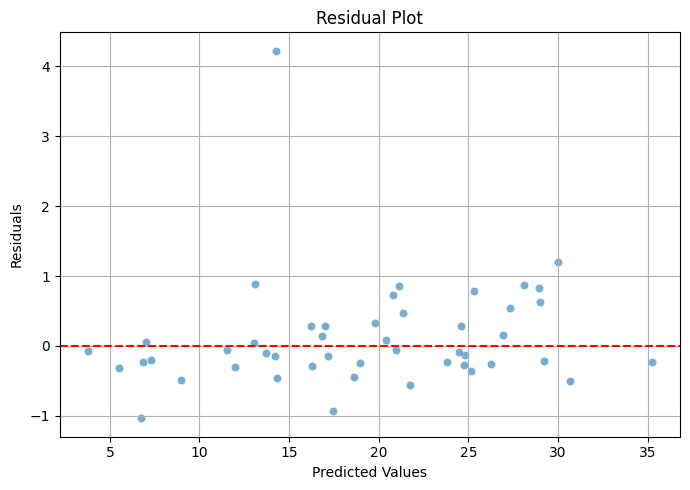

In [75]:
# تحلیل residuals
residuals = y_test - y_pred

plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.tight_layout()

**PolynomialRegression**

<ipython-input-76-5a0af91ff5c7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['BMI'] = (df_clean['Weight'] * 703) / (df_clean['Height'] ** 2)
<ipython-input-76-5a0af91ff5c7>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(['Weight', 'Height'], axis=1, inplace=True)


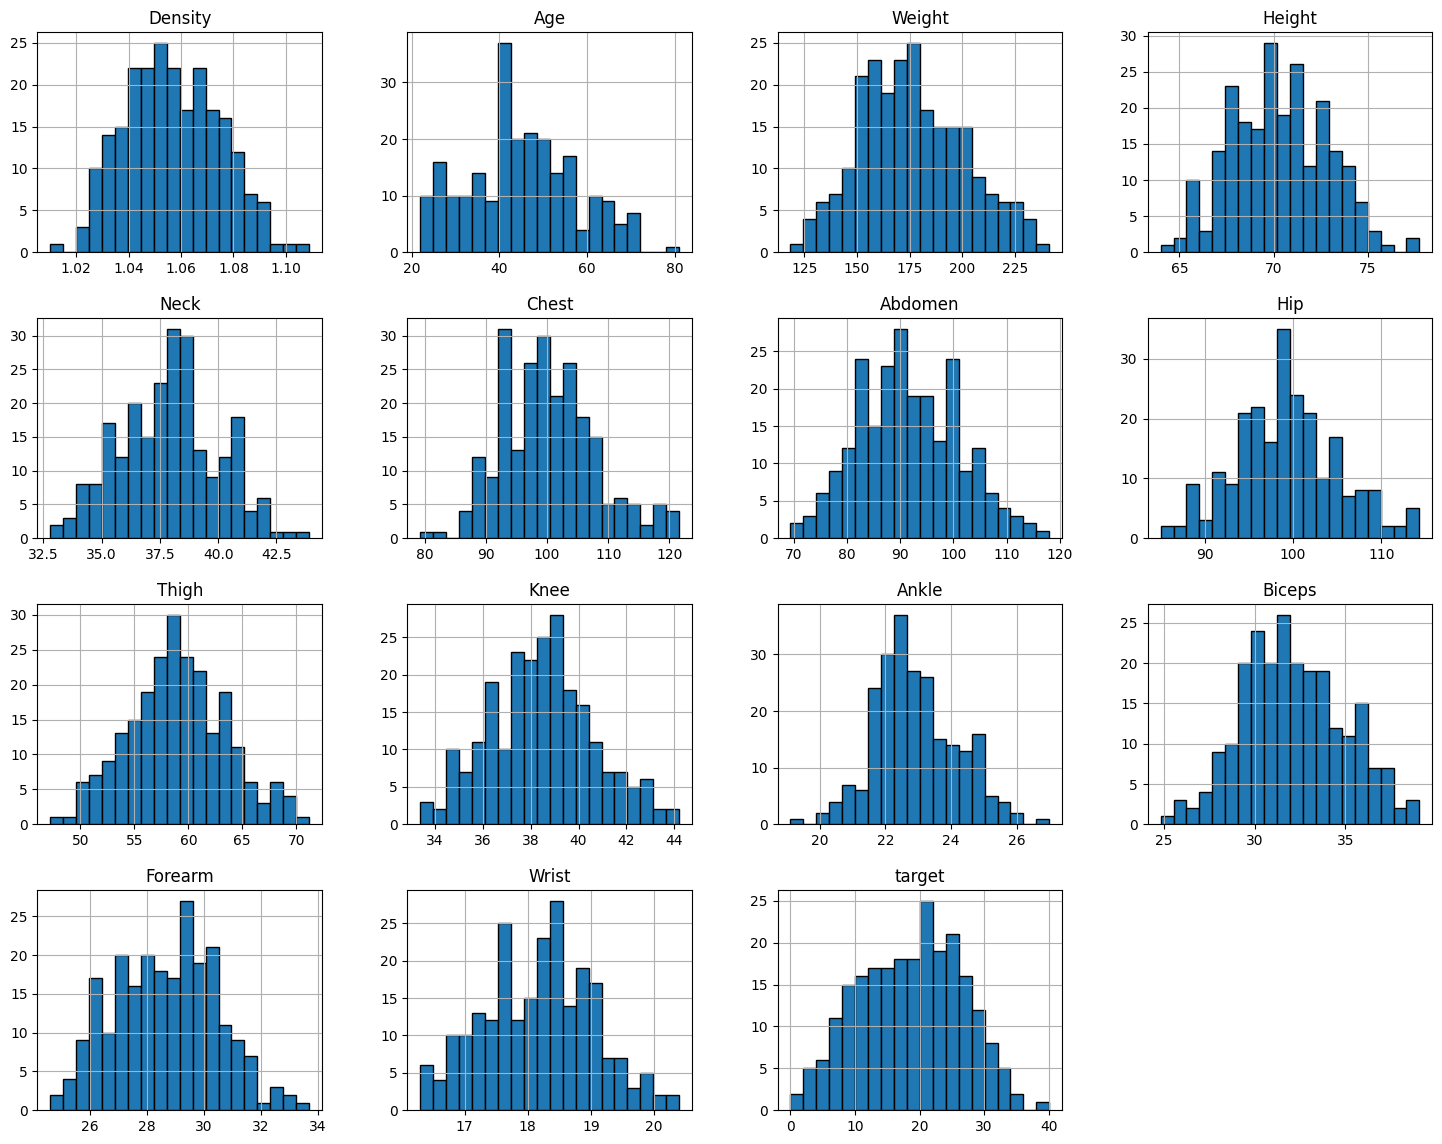

In [76]:
# بارگذاری دیتاست

from sklearn.datasets import fetch_openml
import pandas as pd
dataset = fetch_openml(data_id = 560 , as_frame =True)
df = dataset.frame

df = df.rename(columns={'class':'target'})
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
df_clean = df[~outliers.any(axis=1)]
df_clean.hist(bins=20, figsize=(18, 14), edgecolor='black')

df_clean['BMI'] = (df_clean['Weight'] * 703) / (df_clean['Height'] ** 2)
df_clean.drop(['Weight', 'Height'], axis=1, inplace=True)

In [77]:
from sklearn.model_selection import train_test_split

x = df_clean.drop(columns='target')
y = df_clean['target']

x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

In [94]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [106]:
pipe2 = Pipeline ([
    ('scaler',StandardScaler()),
    ('poly',PolynomialFeatures(degree = 3)),
    ('model2',LinearRegression())
])

In [107]:
pipe2.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=3)),
                ('model2', LinearRegression())])

In [108]:
y_pred = pipe2.predict(x_test)

In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae , mse, rmse , r2 ,

(1.2863608718691801,
 3.232820583717595,
 np.float64(1.7980046117064314),
 0.9466159984583343)

In [83]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipe2 , x , y , cv = 5 , scoring='r2' )
scores

array([ 0.86142166, -0.18189531,  0.86676051,  0.69793102,  0.73846904])

In [91]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

importance_df = (pd.DataFrame({
    'Feature': feature_names,
    'Importance': abs(pipe2.named_steps['model2'].coef_)
})
 .sort_values('Importance', ascending=False)
 .head(16)
 .reset_index(drop=True)
)
importance_df

,Feature,Importance
0,Density,5.9163
1,Abdomen,1.0457
2,Density Chest Forearm,0.6897
3,Density^2 BMI,0.6686
4,Density^3,0.6578
5,Chest Ankle,0.5885
6,Neck Knee,0.5780
7,Density Knee,0.5335
8,Density Wrist BMI,0.5170
9,Neck,0.5095


In [ ]:
import joblib
joblib.dump(pipe, 'linearRegresion_model_pipeline.pkl')